***
# ***Lusanda  Mdhlalose - Activity 5: Principal Component Analysis***
***

<a id="section-4"></a>
### **Table of Contents**
- [Introduction](#1)
  * [Problem Statement](#5)
  * [Data Dictionary](#6)
- [Imports](#7)
  * [Python imports](#8)
  * [Dataset](#9)
- [Exploretory Data Analysis](#10)
  * [Data Overview](#11)
  * [Visualizations](#12)
    * [Univariate Analysis](#13)
    * [Bivariate Analysis](#14)
    * [Multivariate Analysis](#15)
- [Data Pre-processing](#19)
- [Performing The PCA](#25)
- [Visualization After PCA](#37)

***
# ***Introduction***
***

### ***Problem Statement***

For this notebook I will be using a dimensionality reduction algorithm called Principal Component Analysis (PCA).The data I will be using was collected from the laboratory of Medical City Hospital and the Specializes Center for Endocrinology and Diabetes-Al-Kindy Teaching Hospital. My intention with PCA is to be able extract features that have a significant explained variance of the data, helping us discard the other features. Afterwards plot the results to understand the corrleation between the principal components.

### ***Data Dictionary***

- No. of Patient: Unique patient identifier.
- Age: Patient's age (units: years).
- Gender: Patient's gender (categories: male, female).
- Creatinine ratio (Cr) in urine or blood (units: mg/mmol).
- Body Mass Index (BMI) (units: kg/m²).
- Urea concentration (Urea) (units: mmol/L).
- Hemoglobin A1c level (HBA1C) (units: percentage).
- Fasting lipid profile:
    * Total Cholesterol (units: mmol/L).
    * LDL Cholesterol (units: mmol/L).
    * VLDL Cholesterol (units: mmol/L).
    * Triglycerides (TG) (units: mmol/L).
    * HDL Cholesterol (units: mmol/L).
- Classification (Class):
    * N - Not Diabetic
    * P - Predicted Diabetic
    * Y - Diabetic


***
# ***Imports***
***

## ***Python Libraries***

In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


## ***Dataset***

In [232]:
df = pd.read_csv("/content/Dataset of Diabetes .csv") # Uploading the dataset

***
# ***Exploratory Data Analysis***
***

## ***Data Overview***

***Dataset Properties***

In [233]:
df.info() # Basic info about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [234]:
df.head() # First five rows of our dataset

ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1  735      34221      M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2  420      47975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3  680      87656      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4  504      34223      M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   

    BMI CLASS  
0  24.0     N  
1  23.0     N  
2  24.0     N  
3  24.0     N  
4  21.0     N

In [235]:
df.tail() # Last five rows of our dataset

ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
995  200     454317      M   71  11.0  97    7.0   7.5  1.7  1.2  1.8   0.6   
996  671     876534      M   31   3.0  60   12.3   4.1  2.2  0.7  2.4  15.4   
997  669      87654      M   30   7.1  81    6.7   4.1  1.1  1.2  2.4   8.1   
998   99      24004      M   38   5.8  59    6.7   5.3  2.0  1.6  2.9  14.0   
999  248      24054      M   54   5.0  67    6.9   3.8  1.7  1.1  3.0   0.7   

      BMI CLASS  
995  30.0     Y  
996  37.2     Y  
997  27.4     Y  
998  40.5     Y  
999  33.0     Y

In [236]:
df.describe() # Basic stats of the dataset

ID     No_Pation          AGE         Urea           Cr  \
count  1000.000000  1.000000e+03  1000.000000  1000.000000  1000.000000   
mean    340.500000  2.705514e+05    53.528000     5.124743    68.943000   
std     240.397673  3.380758e+06     8.799241     2.935165    59.984747   
min       1.000000  1.230000e+02    20.000000     0.500000     6.000000   
25%     125.750000  2.406375e+04    51.000000     3.700000    48.000000   
50%     300.500000  3.439550e+04    55.000000     4.600000    60.000000   
75%     550.250000  4.538425e+04    59.000000     5.700000    73.000000   
max     800.000000  7.543566e+07    79.000000    38.900000   800.000000   

             HbA1c         Chol           TG          HDL          LDL  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      8.281160     4.862820     2.349610     1.204750     2.609790   
std       2.534003     1.301738     1.401176     0.660414     1.115102   
min       0.900000     0.000000     0.300000     0.200000     0.300000   
25%       6.500000     4.000000     1.500000     0.900000     1.800000   
50%       8.000000     4.800000     2.000000     1.100000     2.500000   
75%      10.200000     5.600000     2.900000     1.300000     3.300000   
max      16.000000    10.300000    13.800000     9.900000     9.900000   

              VLDL          BMI  
count  1000.000000  1000.000000  
mean      1.854700    29.578020  
std       3.663599     4.962388  
min       0.100000    19.000000  
25%       0.700000    26.000000  
50%       0.900000    30.000000  
75%       1.500000    33.000000  
max      35.000000    47.750000

***Missing Value Check***

In [237]:
print("The number of missing values for each column: \n", df.isnull().sum()) # Checking for missing or null values

The number of missing values for each column: 
 ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64


***Duplicates Check***

In [238]:
print("The number of duplicates in the dataset is: ", df.duplicated().sum()) # Checking for duplicated rows

The number of duplicates in the dataset is:  0


## ***Visualizations before PCA***

### ***Univariate Analysis***

In [239]:
# Creating functions for univariate analysis

# Barplot to display the distribution for some of the categorical features in the dataset
def barplot(feature, data):
    # Counting the values(categories) in the feature and normalizing them
    proportions = data[feature].value_counts(normalize=True)

    # Creating the barplot
    sns.barplot(x=proportions.index, y=proportions.values)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Proportions')

    return plt.show()

# Histogram to display the distribution for some of the continuous features in the dataset
def histplot(feature, data):
    sns.histplot(data=data, x=df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plot = plt.show()

    return plt.show()

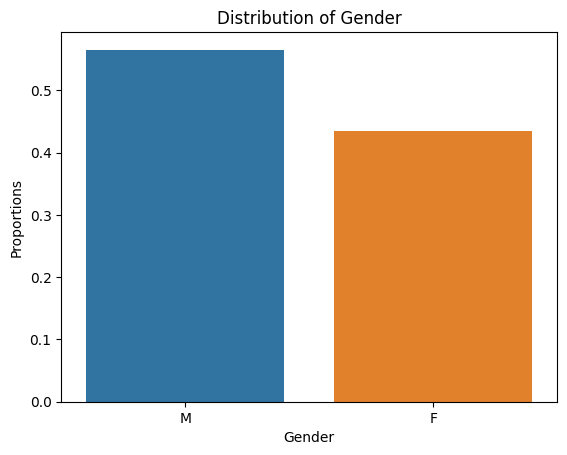

In [240]:
barplot("Gender", df)

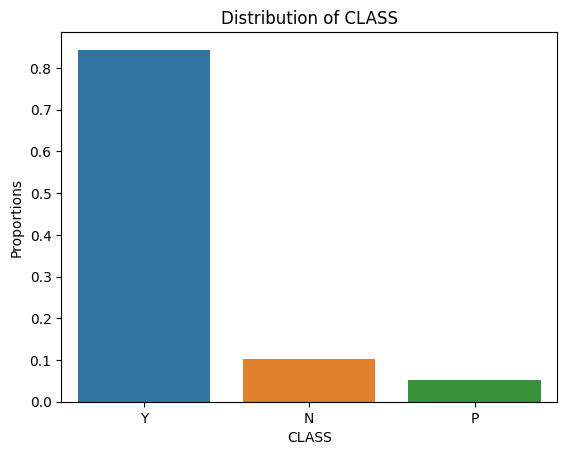

In [241]:
barplot("CLASS", df)

From the above barplot, we can see that there is a signifcant amount of people who are diagonised as Diabetic (Y) and less people diagnosied as Non-Diabetic (N) and Predicted Diabetic(P).

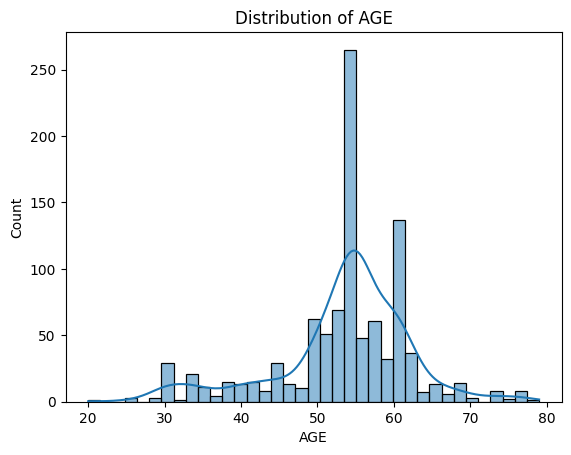

In [242]:
histplot("AGE", df)

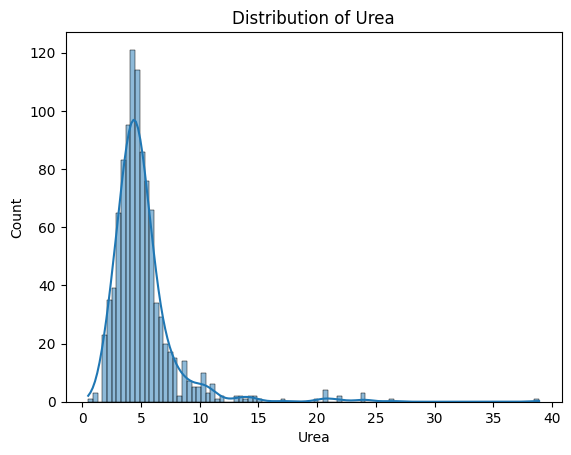

In [243]:
histplot("Urea", df)

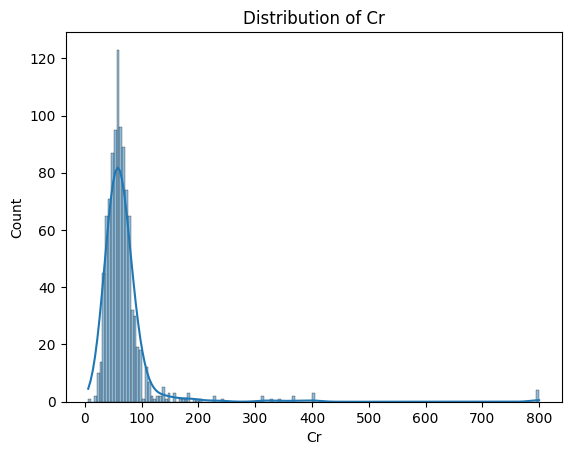

In [244]:
histplot("Cr", df)


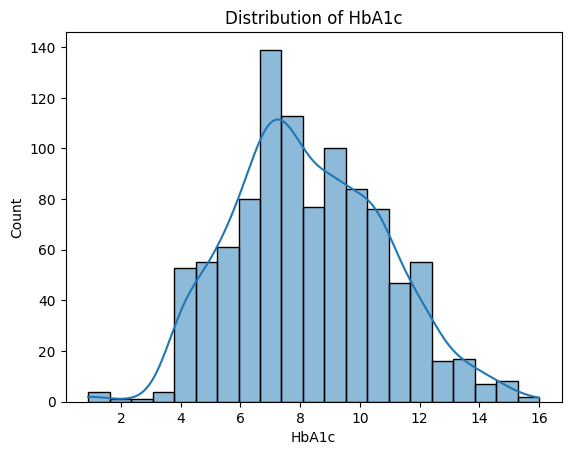

In [245]:
histplot("HbA1c", df)

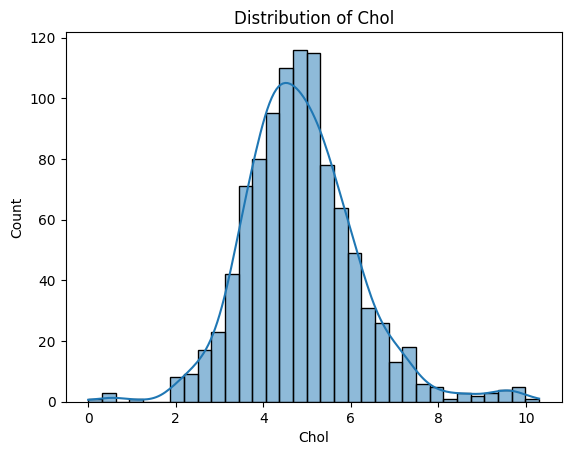

In [246]:
histplot("Chol", df)

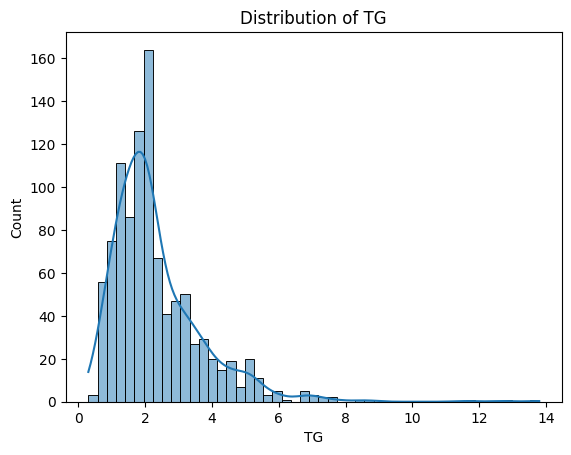

In [247]:
histplot("TG", df)

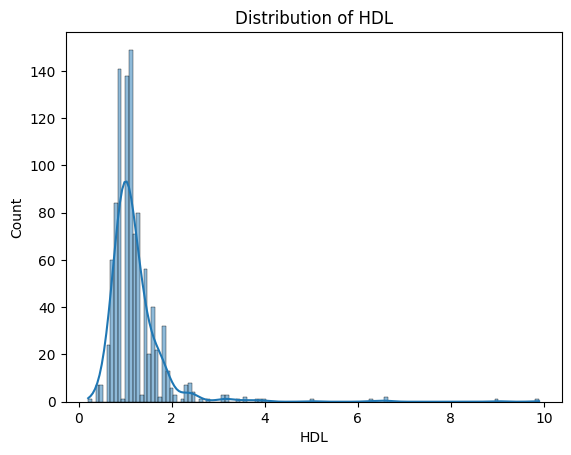

In [248]:
histplot("HDL", df)

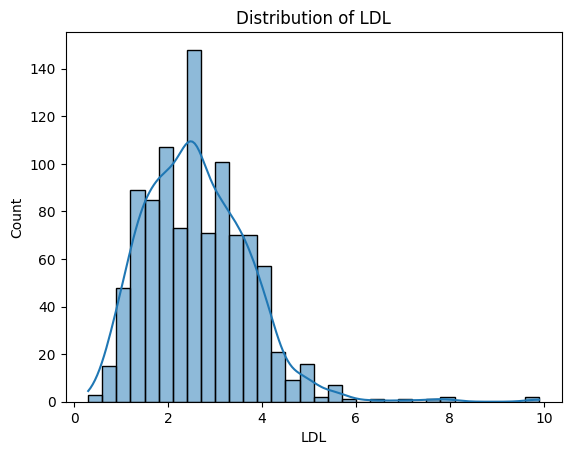

In [249]:
histplot("LDL", df)

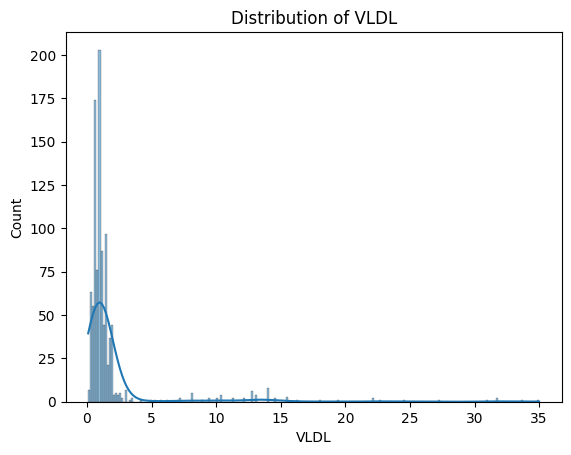

In [250]:
histplot("VLDL", df)

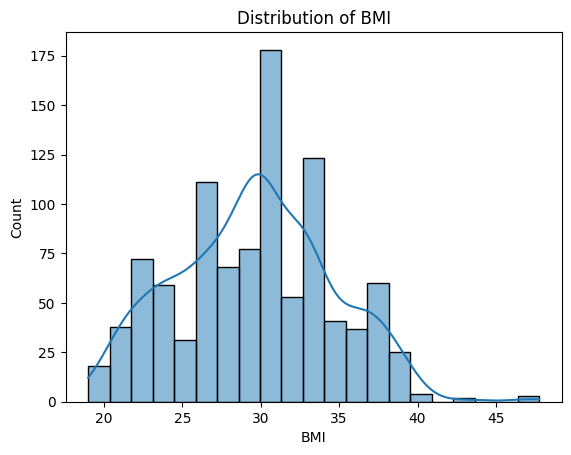

In [251]:
histplot("BMI", df)

### ***Bivariate Analysis***

In [252]:
# Creating plots for bivariate analysis

def scatterplot(data, feature1, feature2):
    sns.scatterplot(x = data[feature1], y = data[feature2], hue=data["CLASS"])
    plt.title(f'{feature1} VS {feature2}')

    return plt.show()

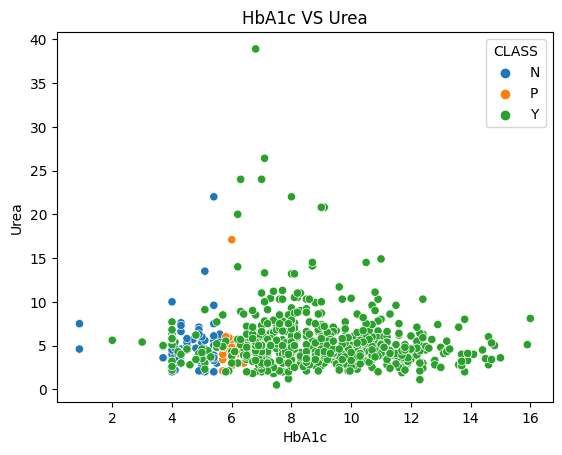

In [253]:
scatterplot(df, "HbA1c", "Urea")

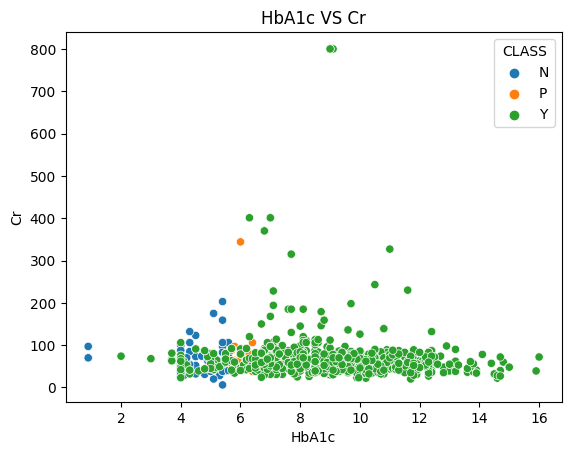

In [254]:
scatterplot(df, "HbA1c", "Cr")

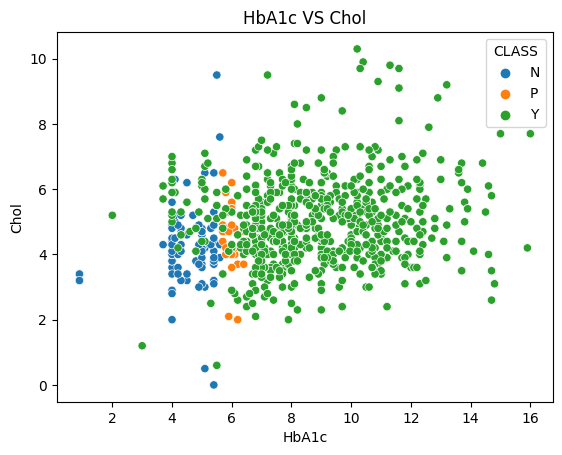

In [255]:
scatterplot(df, "HbA1c", "Chol")

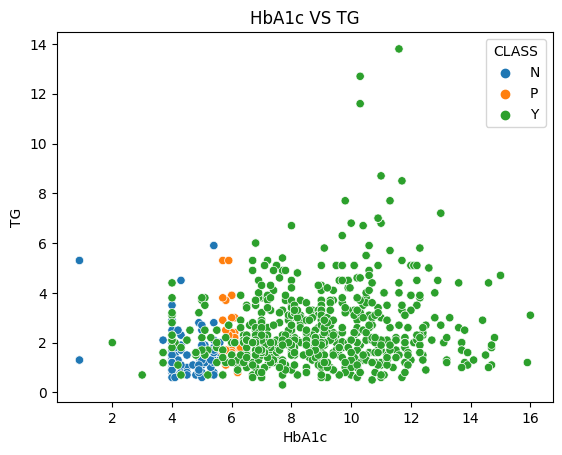

In [256]:
scatterplot(df, "HbA1c", "TG")

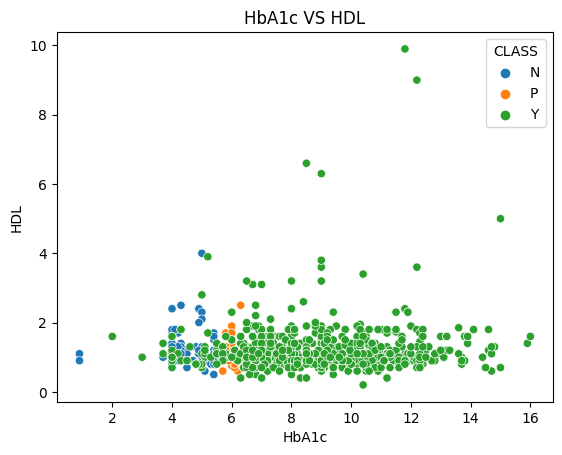

In [257]:
scatterplot(df, "HbA1c", "HDL")

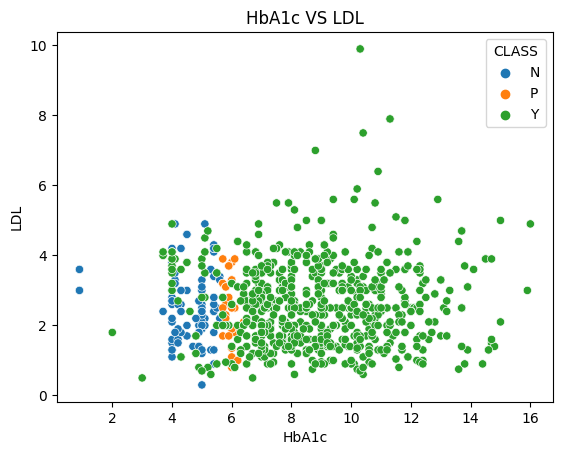

In [258]:
scatterplot(df, "HbA1c", "LDL")

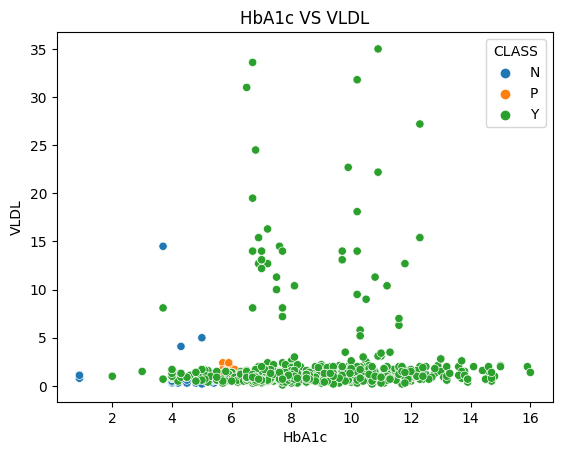

In [259]:
scatterplot(df, "HbA1c", "VLDL")

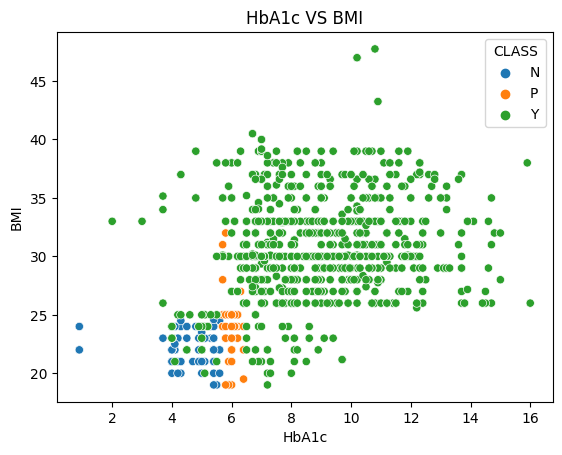

In [260]:
scatterplot(df, "HbA1c", "BMI")

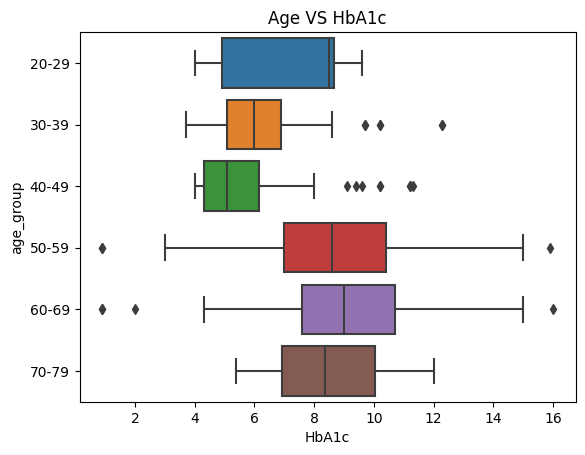

In [261]:
# Creating a suitable bivariate analysis for age.

# age bins to put the ages within our dataset
age_bins = [20, 30, 40, 50, 60, 70, 80]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']

# Creating a new column called 'age_group' for our dataset
df['age_group'] = pd.cut(df['AGE'], bins=age_bins, labels=age_labels, right=False)

sns.boxplot(y=df["age_group"], x=df["HbA1c"])
plt.title('Age VS HbA1c')
plt.show()

In [262]:
del df['age_group'] # Discarding the column afterwards

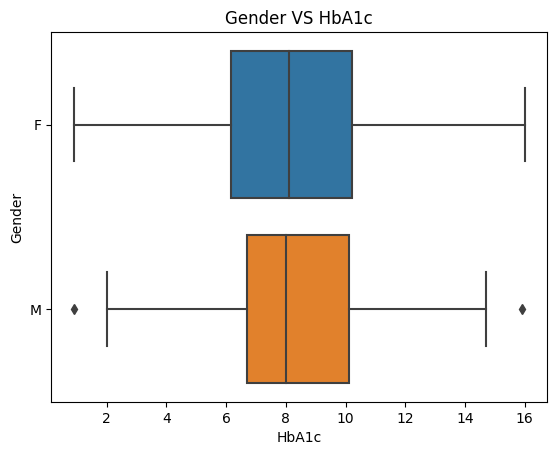

In [263]:
sns.boxplot(y=df["Gender"], x=df["HbA1c"])
plt.title('Gender VS HbA1c')
plt.show()

### ***Multivariate Analysis***


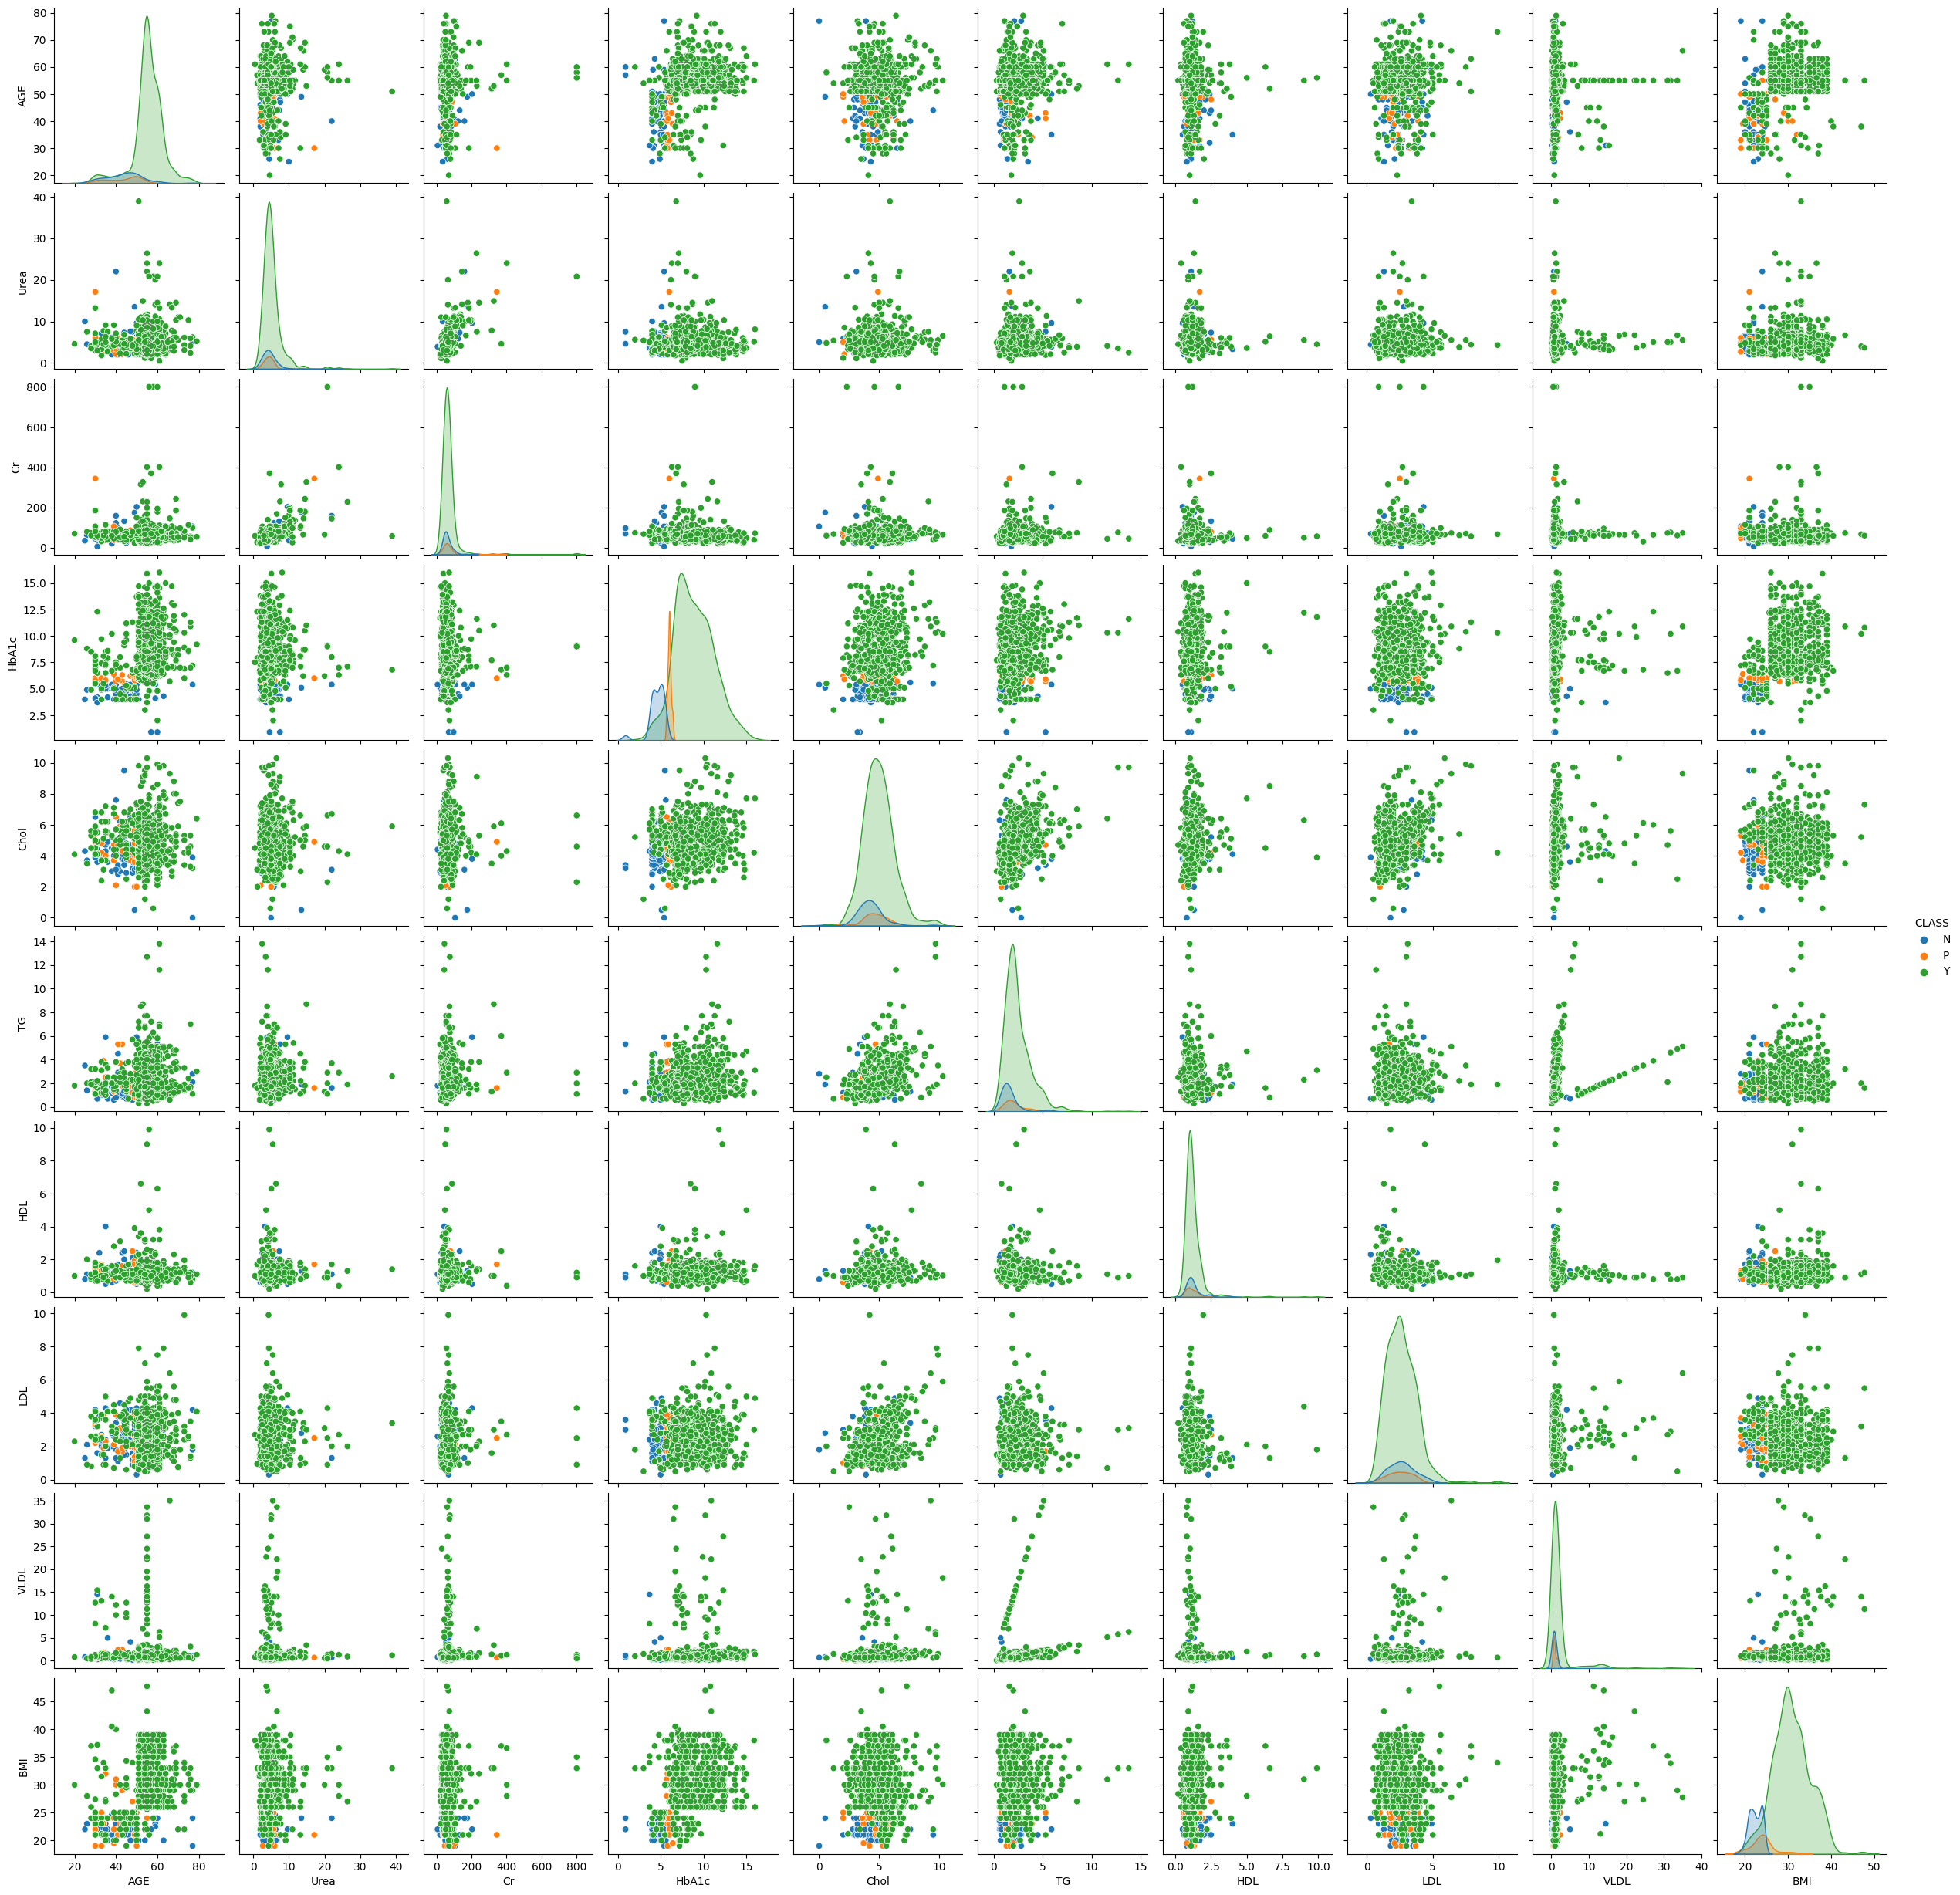

In [264]:
# Creating Paiplot to get a complete overview of the Feature to Feature relationships
df_multi = df.iloc[:,3:] # Isolating the contiuous features within the dataset
sns.pairplot(data=df_multi, hue="CLASS")

In [265]:
# Creating a heatmap to analyze the corrletion between the features in the dataset
df_multi.corr()

AGE      Urea        Cr     HbA1c      Chol        TG       HDL  \
AGE    1.000000  0.105092  0.054941  0.379136  0.036649  0.148204 -0.020038   
Urea   0.105092  1.000000  0.624134 -0.023603  0.001852  0.040980 -0.036994   
Cr     0.054941  0.624134  1.000000 -0.037412 -0.007097  0.056579 -0.023804   
HbA1c  0.379136 -0.023603 -0.037412  1.000000  0.177489  0.218556  0.028933   
Chol   0.036649  0.001852 -0.007097  0.177489  1.000000  0.321789  0.103814   
TG     0.148204  0.040980  0.056579  0.218556  0.321789  1.000000 -0.083001   
HDL   -0.020038 -0.036994 -0.023804  0.028933  0.103814 -0.083001  1.000000   
LDL    0.016105 -0.007301  0.039479  0.011057  0.416665  0.015378 -0.142079   
VLDL  -0.087903 -0.011191  0.009615  0.073462  0.076294  0.144570 -0.059275   
BMI    0.375956  0.045618  0.054746  0.413350  0.013678  0.110757  0.072409   

            LDL      VLDL       BMI  
AGE    0.016105 -0.087903  0.375956  
Urea  -0.007301 -0.011191  0.045618  
Cr     0.039479  0.009615  0.054746  
HbA1c  0.011057  0.073462  0.413350  
Chol   0.416665  0.076294  0.013678  
TG     0.015378  0.144570  0.110757  
HDL   -0.142079 -0.059275  0.072409  
LDL    1.000000  0.062795 -0.067322  
VLDL   0.062795  1.000000  0.198133  
BMI   -0.067322  0.198133  1.000000

***
# ***Data Preprocessing***
***

In [266]:
#   Chosing X values to train he model with
X = df.iloc[:, 3:-1]
X.head()

AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI
0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0
1   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6  23.0
2   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0
3   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0
4   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4  21.0

In [267]:
# Normalizing the training data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

***
# ***Performing the PCA***
***

In [268]:
# Creating a PCA function

def pca_analysis(data, column_names):
    variance = {}

    pca = PCA()
    principal_components = pca.fit_transform(data)
    comp = pca.components_
    explained_variance = pca.explained_variance_ratio_

    for column, value in zip(column_names, explained_variance):
      variance[column] = round(value, 4)

    # Ploting the explained variance of our Princpal Components
    plt.plot(np.cumsum(explained_variance), marker='o')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Explained Variance vs. Number of Components')
    plt.grid(True)
    plot = plt.show()

    pca_df = pd.DataFrame(principal_components, columns=X.columns)

    return plot, variance, pca_df, explained_variance, comp


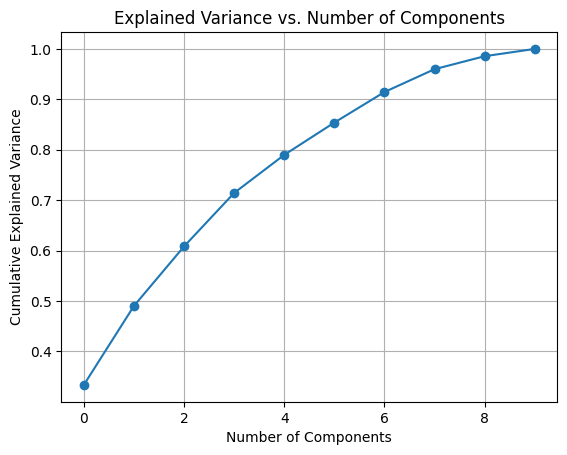

The explained variance for each principal component is: 
 {'AGE': 0.3334, 'Urea': 0.1566, 'Cr': 0.1181, 'HbA1c': 0.1061, 'Chol': 0.0755, 'TG': 0.0641, 'HDL': 0.0606, 'LDL': 0.0454, 'VLDL': 0.0258, 'BMI': 0.0144}


In [269]:
column_names = X.columns

plot, variance, pca_df, explained_variance, comp= pca_analysis(X_scaled, column_names)

print(f'The explained variance for each principal component is: \n {variance}')


In [270]:
df_reduced = pca_df.iloc[:, :4].join(df['CLASS'])
df_reduced.head()


AGE      Urea        Cr     HbA1c CLASS
0  0.307755 -0.119714 -0.067334 -0.008734     N
1  0.514091 -0.062868  0.163099  0.190111     N
2  0.307755 -0.119714 -0.067334 -0.008734     N
3  0.307755 -0.119714 -0.067334 -0.008734     N
4  0.496104  0.020735  0.063011  0.119086     N

***
# ***Visualization After PCA***
***

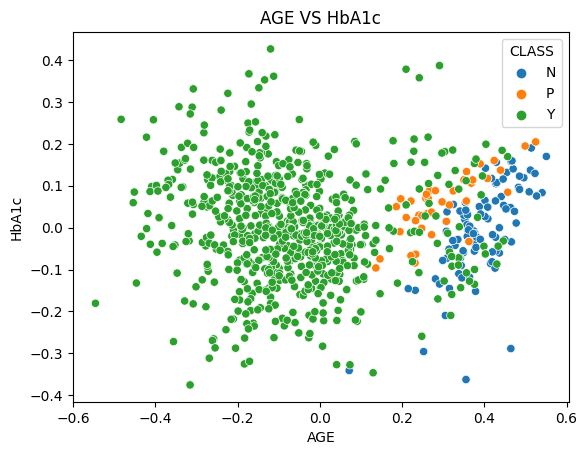

In [271]:
scatterplot(df_reduced, "AGE", "HbA1c")

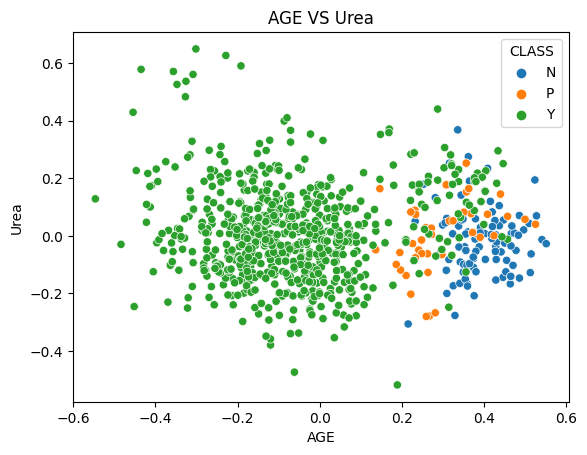

In [272]:
scatterplot(df_reduced, "AGE", "Urea")

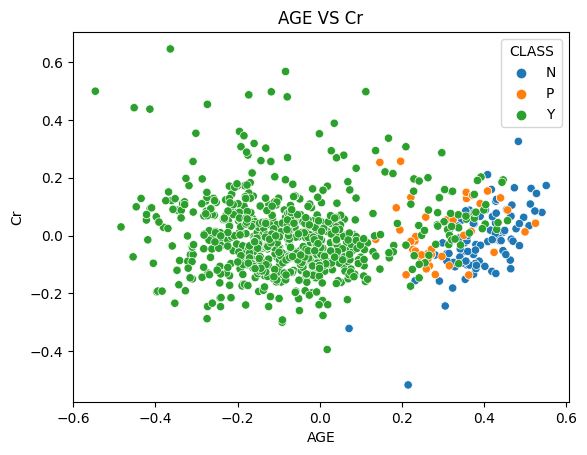

In [273]:
scatterplot(df_reduced, "AGE", "Cr")